In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import pandas_datareader.data as web
import yfinance as yf

In [4]:
import yfinance as yf

# Set your date range
start = '2012-01-01'
end = '2022-12-31'

# Download data directly using yfinance
df = yf.download('AAPL', start=start, end=end)

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Show the first 5 rows
print(df.head())


C:\Users\Asus\AppData\Local\Temp\ipykernel_16924\3023273793.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Date                                                             
2012-01-03  12.359183  12.397353  12.292163  12.304185  302220800
2012-01-04  12.425600  12.462868  12.300575  12.322214  260022000
2012-01-05  12.563553  12.579181  12.402462  12.470986  271269600
2012-01-06  12.694888  12.705407  12.599316  12.615846  318292800
2012-01-09  12.674753  12.855680  12.663332  12.788058  394024400


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2022-12-23,130.173782,130.726619,127.982170,129.245801,63814900
2022-12-27,128.367203,129.729560,127.073957,129.699945,69007800
2022-12-28,124.428223,129.354409,124.260398,128.011800,85438400
2022-12-29,127.952583,128.811453,126.096627,126.353297,75703700
2022-12-30,128.268463,128.288212,125.800440,126.767912,77034200


In [6]:
print(df.isnull().sum())


Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [7]:
print(df.dtypes)


Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


In [8]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2012-01-03,12.359183,12.397353,12.292163,12.304185,302220800
1,2012-01-04,12.425600,12.462868,12.300575,12.322214,260022000
2,2012-01-05,12.563553,12.579181,12.402462,12.470986,271269600
3,2012-01-06,12.694888,12.705407,12.599316,12.615846,318292800
4,2012-01-09,12.674753,12.855680,12.663332,12.788058,394024400


In [9]:
print(df.columns)


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [10]:
df = df.drop(['Date','Volume'],axis = 1)
df.head()

Price,Close,High,Low,Open
0,12.359183,12.397353,12.292163,12.304185
1,12.425600,12.462868,12.300575,12.322214
2,12.563553,12.579181,12.402462,12.470986
3,12.694888,12.705407,12.599316,12.615846
4,12.674753,12.855680,12.663332,12.788058


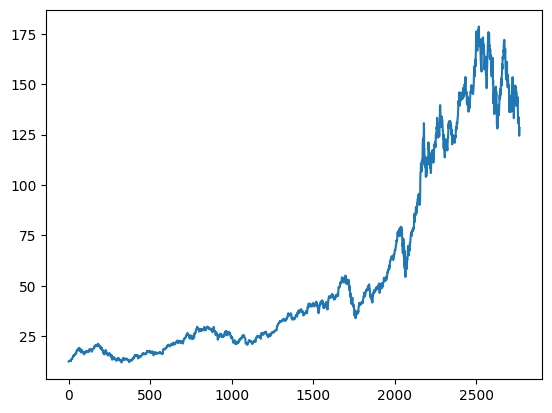

In [11]:
plt.plot(df.Close)

In [12]:
df

Price,Close,High,Low,Open
0,12.359183,12.397353,12.292163,12.304185
1,12.425600,12.462868,12.300575,12.322214
2,12.563553,12.579181,12.402462,12.470986
3,12.694888,12.705407,12.599316,12.615846
4,12.674753,12.855680,12.663332,12.788058
...,...,...,...,...
2763,130.173782,130.726619,127.982170,129.245801
2764,128.367203,129.729560,127.073957,129.699945
2765,124.428223,129.354409,124.260398,128.011800
2766,127.952583,128.811453,126.096627,126.353297


In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    148.424346
2764    148.076099
2765    147.690729
2766    147.345334
2767    147.002605
Name: Close, Length: 2768, dtype: float64

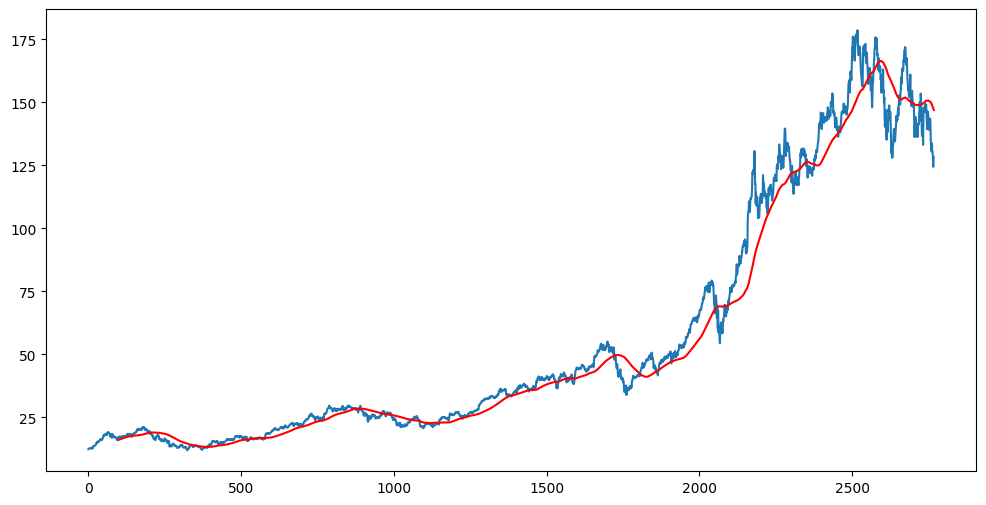

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    149.826821
2764    149.708340
2765    149.590360
2766    149.468037
2767    149.325181
Name: Close, Length: 2768, dtype: float64

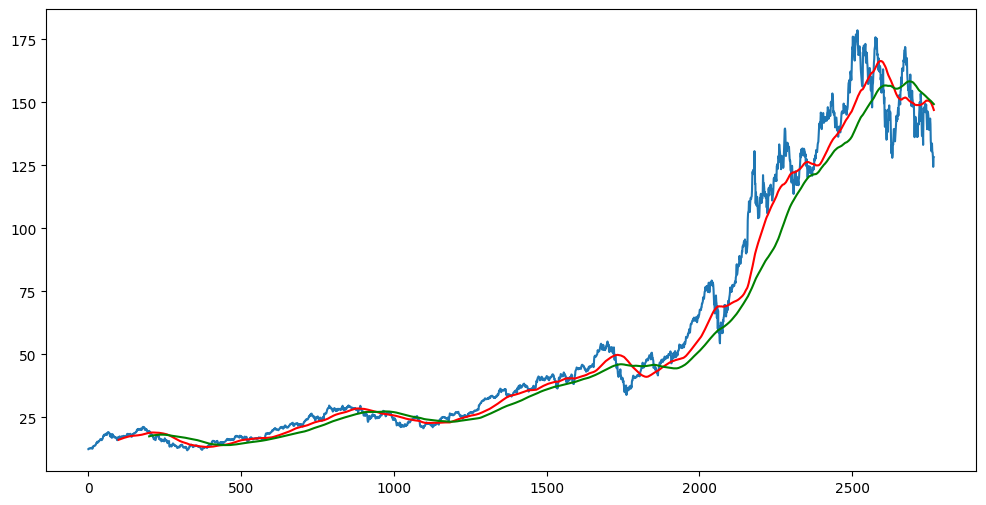

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(2768, 4)

# splitting Data into Training and Testing

In [18]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])
print(data_training.shape,data_testing.shape)

(1937, 1) (831, 1)


In [19]:
data_training.head()

,Close
0,12.359183
1,12.425600
2,12.563553
3,12.694888
4,12.674753


In [20]:
data_testing.head()

,Close
1937,53.009895
1938,53.202744
1939,53.701756
1940,53.265419
1941,52.486774


In [21]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.01039582],
       [0.01193401],
       [0.01512895],
       ...,
       [0.97245476],
       [0.96966343],
       [0.94543323]])

In [23]:
x_train = [] #first 100 days will be this
y_train = [] #101 day will be this

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train

[array([[0.01039582],
        [0.01193401],
        [0.01512895],
        [0.01817063],
        [0.01770432],
        [0.01875534],
        [0.01827511],
        [0.01746761],
        [0.01636784],
        [0.01977157],
        [0.02284107],
        [0.02189454],
        [0.01670895],
        [0.02165783],
        [0.01678546],
        [0.03505668],
        [0.03364376],
        [0.03548821],
        [0.03947651],
        [0.04189193],
        [0.04168996],
        [0.0409452 ],
        [0.0441192 ],
        [0.04710529],
        [0.05048809],
        [0.05595196],
        [0.06742981],
        [0.06760377],
        [0.07399346],
        [0.07876845],
        [0.07056198],
        [0.07372205],
        [0.07365933],
        [0.08252   ],
        [0.08126021],
        [0.08359196],
        [0.08778218],
        [0.09011386],
        [0.09683081],
        [0.10172383],
        [0.10313681],
        [0.10363116],
        [0.09526477],
        [0.09324619],
        [0.09354536],
        [0

In [24]:
x_train = np.array(x_train)
x_train

array([[[0.01039582],
        [0.01193401],
        [0.01512895],
        ...,
        [0.11183738],
        [0.1212968 ],
        [0.11764957]],

       [[0.01193401],
        [0.01512895],
        [0.01817063],
        ...,
        [0.1212968 ],
        [0.11764957],
        [0.11554041]],

       [[0.01512895],
        [0.01817063],
        [0.01770432],
        ...,
        [0.11764957],
        [0.11554041],
        [0.12248702]],

       ...,

       [[0.85364517],
        [0.85735752],
        [0.87370193],
        ...,
        [0.91478276],
        [0.91986343],
        [0.93398812]],

       [[0.85735752],
        [0.87370193],
        [0.87192898],
        ...,
        [0.91986343],
        [0.93398812],
        [0.97245476]],

       [[0.87370193],
        [0.87192898],
        [0.86151284],
        ...,
        [0.93398812],
        [0.97245476],
        [0.96966343]]])

In [25]:
y_train = np.array(y_train)
y_train

array([0.11554041, 0.12248702, 0.1272897 , ..., 0.97245476, 0.96966343,
       0.94543323])

In [26]:
x_train.shape

(1837, 100, 1)

# ML Model

In [27]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True ,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu' ))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 26s 244ms/step - loss: 0.0098
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 253ms/step - loss: 0.0072
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 253ms/step - loss: 0.0062
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 251ms/step - loss: 0.0062
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 246ms/step - loss: 0.0059
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 268ms/step - loss: 0.0055
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - loss: 0.0048
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - loss: 0.0048
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 253ms/step - loss: 0.0045
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 245ms/step - loss: 0.0043


In [33]:
model.save('keras_model.h5')

In [34]:
data_testing.head()

,Close
1937,53.009895
1938,53.202744
1939,53.701756
1940,53.265419
1941,52.486774


In [35]:
data_training.tail(100)

,Close
1837,49.558868
1838,49.109116
1839,48.874668
1840,48.948837
1841,48.006268
...,...
1932,51.628605
1933,52.238487
1934,53.899418
1935,53.778893


In [36]:
past_100_days = data_training.tail(100)

In [37]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [38]:
final_df.head()

,Close
0,49.558868
1,49.109116
2,48.874668
3,48.948837
4,48.006268


In [39]:
input_data = scalar.fit_transform(final_df)

In [40]:
input_data.shape

(931, 1)

In [41]:
x_test = []
y_test = []

In [42]:
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [43]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


# making Prediction


In [44]:
y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step


In [45]:
y_test

array([0.08313441, 0.08454178, 0.08818347, 0.08499917, 0.07931677,
       0.08105846, 0.07922894, 0.0851223 , 0.08311681, 0.08123443,
       0.09029455, 0.0913852 , 0.08148072, 0.08475291, 0.0956426 ,
       0.09573055, 0.09105088, 0.09567774, 0.10106101, 0.11182754,
       0.11122937, 0.11026174, 0.10859052, 0.11019148, 0.1121794 ,
       0.11939224, 0.11842464, 0.12408934, 0.12479308, 0.13007081,
       0.13441605, 0.1242829 , 0.12423009, 0.1339059 , 0.14632615,
       0.14928164, 0.14863074, 0.14882419, 0.15404719, 0.15530008,
       0.15893487, 0.15851147, 0.16294045, 0.15971136, 0.16521664,
       0.16758112, 0.16615181, 0.16068174, 0.15859972, 0.15819377,
       0.16629301, 0.16262284, 0.16888693, 0.16784564, 0.16239336,
       0.15408263, 0.15812323, 0.16489906, 0.17395111, 0.16726347,
       0.17001624, 0.17405684, 0.17527446, 0.18178531, 0.19009629,
       0.19106687, 0.18988466, 0.19037852, 0.18935516, 0.19740134,
       0.19787777, 0.20782985, 0.20763559, 0.21067054, 0.21442

In [46]:
y_predicted.shape

(831, 1)

In [47]:
scalar.scale_

array([0.00729781])

In [48]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

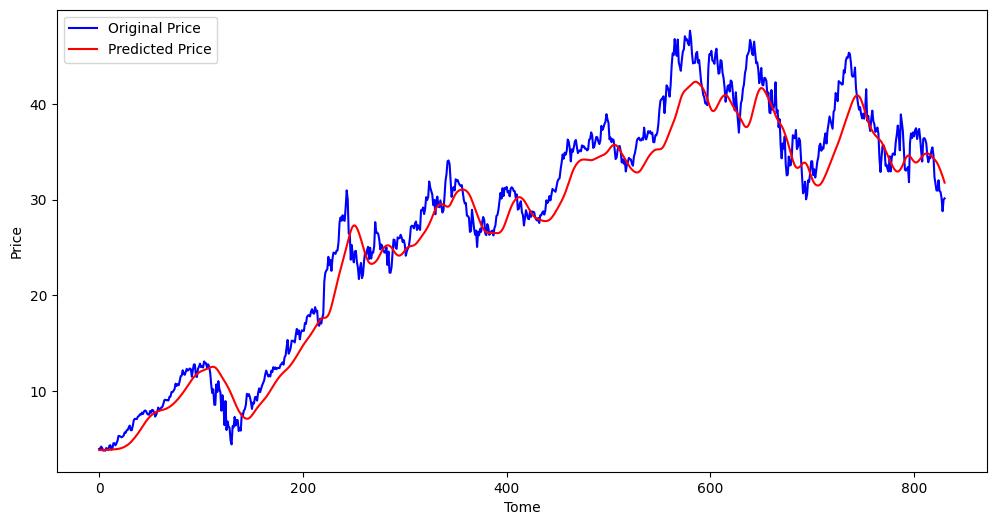

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Predicted Price')
plt.xlabel('Tome')
plt.ylabel('Price')
plt.legend()